# IFT 6758 - Devoir 3 

### Pt 1. Reddit Weekends

Évaluation pour ce notebook:

- Histogrammes pour les counts de base, les counts transformés, et les counts du théorème limite central
- Réponses courtes (dernière section)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from datetime import date
import scipy.stats as sp

In [4]:
import reddit_weekends

## 1. Charger les données

Lire les données JSON et filtrer/nettoyer le dataframe

In [5]:
raw_df = reddit_weekends.read_data("data/reddit-counts.json.gz")

In [7]:
raw_df.head()

,date,subreddit,comment_count
0,2012-02-20,newfoundland,7
1,2015-01-26,Manitoba,1
2,2013-09-07,Yukon,2
3,2014-02-15,saskatchewan,5
4,2014-07-06,canada,1652


In [8]:
# TODO: Complétez ces implémentations dans reddit_weekends.py
df = reddit_weekends.process_data(raw_df)
wd, we = reddit_weekends.split_data(df)

### T-Test

In [10]:
# TODO: Complétez ces implémentations dans reddit_weekends.py
p_ttest, p_wdNormal, p_weNormal, p_vartest = reddit_weekends.tests(wd, we, verbose=True)

p_value:	0.0
WD normality:	0.0
WE normality:	0.00152
Variance test:	0.04379


### Solution 1: transformer les données pourrait nous aider

Jetez un oeil à l'histogramme des données. Vous remarquerez qu'il est biaisé: c'est la raison pour laquelle il n'a pas été distribué normalement dans la dernière partie. Essayez de transformer les décomptes afin que les données n'échouent pas au test de normalité. Considérez les transformations suivantes :

     np.log, np.exp, np.sqrt, counts**2
    
Pour chaque transformation, tracez le nouvel histogramme (`reddit_weekends.draw_histogram()`) et exécutez la méthode `reddit_weekends.tests()` pour voir si vous pouvez maintenant utiliser le test T.
    
Remarque: aucune d'entre elles ne fera passer le test de normalité aux deux distributions. Le mieux que vous pouvez obtenir est une variable avec des problèmes de normalité, une bonne; pas de problèmes de variance égale.

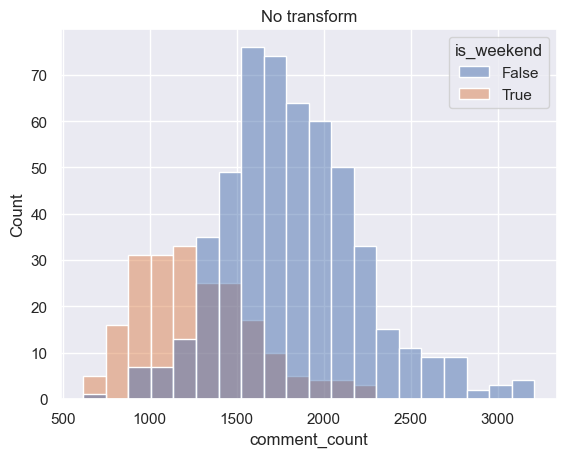

In [11]:
fig = reddit_weekends.draw_histogram(df, title="No transform")

p_value:	0.0
WD normality:	0.0004
WE normality:	0.31494
Variance test:	0.00042


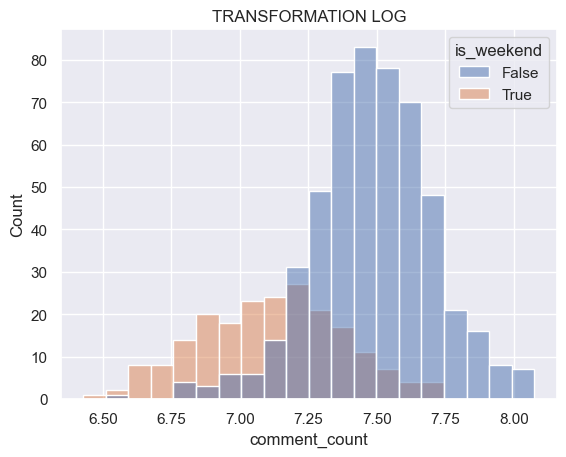

In [15]:
tmp_df = df.copy()

# TODO: Appliquez les transformations aux données copiées (ne modifiez pas le dataframe original!)
# Transformation np.log à la colonne 'comment_count'
tmp_df['comment_count'] = tmp_df['comment_count'].apply(np.log)

# TODO: Tracez l'histogramme
reddit_weekends.draw_histogram(tmp_df, title="TRANSFORMATION LOG")

# TODO: Exécutez les tests à nouveau
_wd, _we = reddit_weekends.split_data(tmp_df)
_ = reddit_weekends.tests(_wd, _we, verbose=True)

KeyError: (('hue', False),)

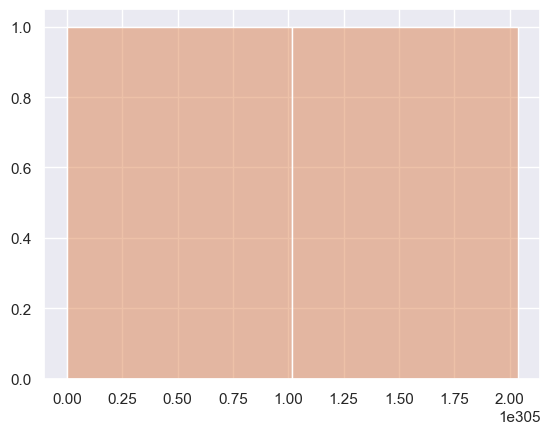

In [40]:
# TODO: RÉPÉTEZ POUR LES AUTRES TRANSFORMATIONS
tmp_df = df.copy()

# Transformation np.log à la colonne 'comment_count'
tmp_df['comment_count'] = tmp_df['comment_count'].apply(np.exp)

# TODO: Tracez l'histogramme
reddit_weekends.draw_histogram(tmp_df, title="EXP TRANSFORMATION")

# TODO: Exécutez les tests à nouveau
_wd, _we = reddit_weekends.split_data(tmp_df)
_ = reddit_weekends.tests(_wd, _we, verbose=True)


# Ici la transformation expodentielle ne fonctionne pas parce que les valeurs sont bien trop grandes.
# exp(1800) donne une valeur infini 

p_value:	0.0
WD normality:	0.03687
WE normality:	0.10761
Variance test:	0.55605


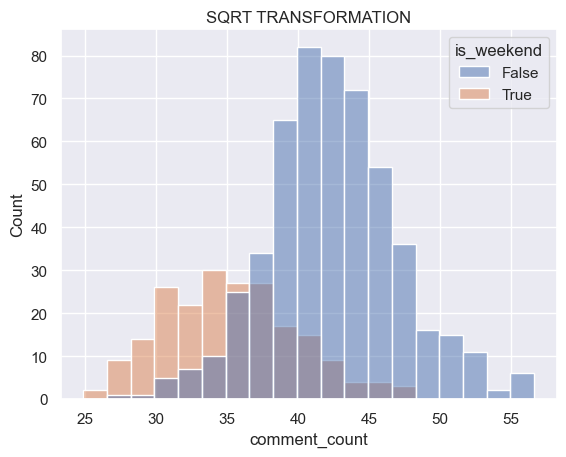

In [41]:
# TODO: RÉPÉTEZ POUR LES AUTRES TRANSFORMATIONS
tmp_df = df.copy()

# Transformation np.log à la colonne 'comment_count'
tmp_df['comment_count'] = tmp_df['comment_count'].apply(np.sqrt)

# TODO: Tracez l'histogramme
reddit_weekends.draw_histogram(tmp_df, title="SQRT TRANSFORMATION")

# TODO: Exécutez les tests à nouveau
_wd, _we = reddit_weekends.split_data(tmp_df)
_ = reddit_weekends.tests(_wd, _we, verbose=True)

p_value:	0.0
WD normality:	0.0
WE normality:	0.0
Variance test:	0.0


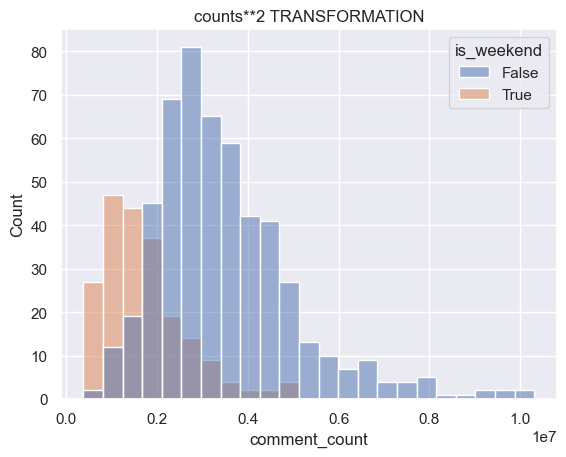

In [44]:
# TODO: RÉPÉTEZ POUR LES AUTRES TRANSFORMATIONS
tmp_df = df.copy()

# Transformation np.log à la colonne 'comment_count'
tmp_df['comment_count'] = tmp_df['comment_count'].apply(np.square)

# TODO: Tracez l'histogramme
reddit_weekends.draw_histogram(tmp_df, title="counts**2 TRANSFORMATION")

# TODO: Exécutez les tests à nouveau
_wd, _we = reddit_weekends.split_data(tmp_df)
_ = reddit_weekends.tests(_wd, _we, verbose=True)

# Correction 2: le théorème central limite pourrait nous sauver.

Le théorème central limite dit que si nos nombres sont suffisamment grands et que nous examinons les moyennes de l'échantillon, alors le résultat devrait être normal.
Essayons cela: nous combinerons tous les jours de semaine et de week-end de chaque paire année/semaine et prendrons la moyenne de leurs décomptes (non transformés).

Astuces: vous pouvez obtenir une "année" et un "numéro de semaine" à partir des deux premières valeurs renvoyées par date.isocalendar(). Cette année et ce numéro de semaine vous donneront un identifiant pour la semaine. Utilisez Pandas pour regrouper par cette valeur et agréger en prenant la moyenne. 

Remarque: l'année renvoyée par isocalendar n'est pas toujours la même que l'année de la date (autour de la nouvelle année). Utilisez l'année de l'isocalendar qui est correcte dans ce cas.

Vérifiez ces valeurs pour la normalité et la variance égale. Appliquez un test T si cela a du sens. (Indice : youpi !)

Nous devrions noter que nous modifions subtilement la question ici. La nouvelle questions ressemble plutôt à "le nombre de commentaires le week-end diffère-t-il du nombre de commentaires les jours de semaine pour chaque semaine?"

In [29]:
# TODO: Complétez ces implémentations dans reddit_weekends.py
clt = reddit_weekends.central_limit_theorem(df)
clt.head()

,is_weekend,comment_count
0,True,995.0
1,False,1561.6
2,True,1163.0
3,False,2062.8
4,True,1372.0


p_value:	0.0
WD normality:	0.30826
WE normality:	0.15295
Variance test:	0.20384


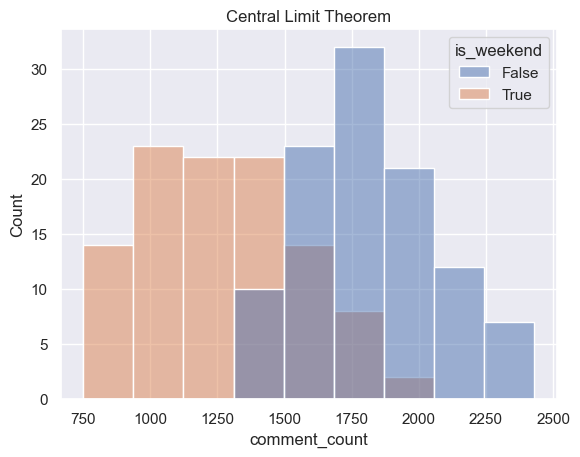

In [30]:
reddit_weekends.draw_histogram(clt, "Central Limit Theorem")

_wd, _we = reddit_weekends.split_data(clt)
_ = reddit_weekends.tests(_wd, _we, verbose=True)

## Correction 3: un test non paramétrique pourrait nous sauver.

L'autre option que nous avons dans notre boîte à outils : un test statistique qui ne se soucie pas autant de la forme de son entrée. Le test U de Mann – Whitney ne suppose pas de valeurs distribuées normalement ni de variance égale.

Effectuez un test U sur les décomptes (initiaux non transformés, non agrégés). Notez que nous devrions faire ici un test bilatéral, qui correspondra aux autres analyses. Assurez-vous que les arguments de la fonction sont corrects.

Encore une fois, notez que nous modifions subtilement la question à nouveau. Si nous parvenons à une conclusion à cause d'un test U, c'est quelque chose comme "il n'est pas également probable qu'il y a un plus grand nombre de commentaires le week-end par rapport aux jours de semaine".

In [31]:
# TODO: Complétez ces implémentations dans reddit_weekends.py
p_utest = reddit_weekends.mann_whitney_u_test(wd, we)
print(f"Mann-Whitney U-test p-value: {p_utest}")

Mann-Whitney U-test p-value: 8.6244532347343e-53


# Réponses courtes

1. Laquelle des quatre transformations suggérées vous rapproche le plus de satisfaire les hypothèses d'un test T ?

*La transformation par racine carrée (sqrt) est la plus proche de satisfaire les hypothèses d'un test T, car elle améliore la normalité et l'égalité des variances des données par rapport aux autres transformations.*


2. J'ai donné des explications imprécises en mots de ce que le test hebdomadaire et le test de Mann-Whitney testaient réellement.
    Faites de même pour le test T d'origine et pour le test T des données transformées.
    Autrement dit, décrivez quelle serait la conclusion si vous pouviez rejeter l'hypothèse nulle dans ces tests.

*L'hypothèse nulle pour le test T stipule qu'il n'y a pas de différence significative dans le nombre moyen de commentaires postés sur Reddit pendant les jours de semaine et les week-ends. Pour les données transformées, cette hypothèse s'applique également. Si l'hypothèse nulle est rejetée dans l'un ou l'autre cas, cela indiquerait une différence statistiquement significative dans le nombre moyen de commentaires postés pendant ces deux périodes distinctes. Cela signifierait que le jour de la semaine influence le volume de commentaires sur Reddit.*


3. Parmi les quatre approches, laquelle, selon vous, réussit le mieux à obtenir une réponse à la question initiale : "y a-t-il un nombre différent de commentaires Reddit publiés en semaine et le week-end ?"
    Expliquez brièvement pourquoi. (Il n'est pas clair qu'il y ait une seule réponse correcte à cette question, mais il y en a de mauvaises !)

*L'approche avec le théorème central limite, semble être la meilleure approche pour répondre à la question initiale. Les tests de normalité indiquent que les données sont plus proches de la normalité dans cette option, et le test de variance montre qu'il n'y a pas de différence significative dans les variances. Cela rend le test T plus fiable dans ce contexte. Bien que la p-value soit de 0.0, indiquant un rejet clair de l'hypothèse nulle, l'approche du théorème central limite assure que les prérequis pour appliquer le test T sont respectés*


4. En moyenne, sur Reddit /r/canada, en moyenne: est-ce qu'il y a plus de commentaires publiés en semaine ou le week-end ?

*En moyenne, il y a plus de commentaires publiés le week-end sur Reddit /r/canada par rapport à la semaine pour chaque semaine.*
